In [2]:
import pandas as pd
import numpy as np
#import sys
from numpy import NaN
from scipy import stats
import statistics
import matplotlib.pyplot as plt
#from matplotlib_venn import venn2
from sklearn.svm import SVC
#from sklearn.cluster import KMeans
#from scipy import signal
from scipy import linalg
from sklearn.decomposition import FastICA, PCA
#from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import plot_confusion_matrix

#%matplotlib inline  
#%matplotlib notebook
#%pylab

In [3]:
# uncomment this if you want to see all the dataframe
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)

In [4]:
MCF7_TGF_scRNAseq = pd.read_csv('MCF7_TGFB1.normalized.txt',sep='\t',index_col=0)
MCF7_EGF_scRNAseq = pd.read_csv('MCF7_EGF.normalized.txt',sep='\t',index_col=0)
MCF7_TNF_scRNAseq = pd.read_csv('MCF7_TNF.normalized.txt',sep='\t',index_col=0)

MCF7_TGF_scRNAseq

,AAACCCATCTTCCTAA,AAACGAATCCATTTAC,AAAGAACGTCAGACTT,AAAGGTAAGGCTAGCA,AAAGGTACAAATAAGC,AAAGTCCGTAGTCGTT,AAAGTGAAGCTAAACA,AAATGGATCGGCTGGT,AACAAAGTCATGGCCG,AACAACCTCAAGAGTA,...,CGTAATGCAGAGGTAC,CTGAGGCAGTTCTACG,GGGATGAAGGTGCAGT,GTGACGCAGGATCATA,GTTCATTAGAACAGGA,TCGACCTGTATGAAAC,TGAGACTGTCTGTGTA,TTGATGGCATTGTACG,TTGGGATGTGCGGCTT,GTGTTCCTCCGTCCTA
AL669831.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.387417,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.514127
LINC00115,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FAM41C,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AL645608.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AL645608.1,0.000000,0.314153,0.000000,0.000000,0.000000,0.000000,0.000000,0.387417,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.919241,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT-ND6,1.926514,1.045737,1.765408,0.671896,1.964029,2.060501,1.728501,1.213682,1.598121,1.756115,...,0.778724,1.782308,1.842434,1.717651,0.000000,1.461145,1.531795,1.320084,2.097350,1.852765
MT-CYB,5.155024,4.894151,6.047647,4.987761,5.331391,5.027519,5.357663,5.202640,4.736670,4.883325,...,5.400038,5.296147,5.197641,5.778536,4.906440,4.910026,5.078698,5.158223,5.833515,5.544223
BX004987.1,0.000000,0.000000,0.000000,0.671896,0.000000,0.000000,0.000000,0.387417,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AL354822.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
MCF7_TGF_metadata = pd.read_csv('MCF7_TGFB1_metadata.txt',sep='\t',index_col=0)
MCF7_EGF_metadata = pd.read_csv('MCF7_EGF_metadata.txt',sep='\t',index_col=0)
MCF7_TNF_metadata = pd.read_csv('MCF7_TNF_metadata.txt',sep='\t',index_col=0)

MCF7_TGF_metadata

,orig.ident,nCount_RNA,nFeature_RNA,percent.mito,Barcode,Drug,Target,CellLine,Treatment,Doublet,Condition,DrugBroad,ConditionBroad,S.Score,G2M.Score,Phase,RNA_snn_res.0.1,seurat_clusters,RNA_snn_res.0.25
AAACCCATCTTCCTAA,Plate3,13639,3481,0.123469,Bar37,Valproic Acid,GSK3B,MCF7,TGFB1,Singlet,TGFB1_Valproic Acid,Inhibited,TGFB1_Inhibited,-0.133452,-0.190934,G1,0,0,0
AAACGAATCCATTTAC,Plate3,27093,5347,0.082900,Bar33,Ruxolitinib,JAK1-2,MCF7,TGFB1,Singlet,TGFB1_Ruxolitinib,Inhibited,TGFB1_Inhibited,-0.108294,0.245672,G2M,0,1,1
AAAGAACGTCAGACTT,Plate3,14451,3497,0.311812,Bar41,LY364947,TGFB1,MCF7,TGFB1,Singlet,TGFB1_LY364947,Inhibited,TGFB1_Inhibited,0.053325,0.279583,G2M,0,0,0
AAAGGTAAGGCTAGCA,Plate3,10439,2848,0.114379,Bar45,AG-370,PDGFR,MCF7,TGFB1,Singlet,TGFB1_AG-370,Inhibited,TGFB1_Inhibited,-0.187415,-0.206967,G1,0,0,0
AAAGGTACAAATAAGC,Plate3,11423,3002,0.140681,Bar43,Y-27632 2HCl,ROCK,MCF7,TGFB1,Singlet,TGFB1_Y-27632 2HCl,Inhibited,TGFB1_Inhibited,-0.161989,-0.165441,G1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGACCTGTATGAAAC,Plate3,9061,2840,0.088180,Bar26,Doramapimod,MAPK,MCF7,TGFB1,Singlet,TGFB1_Doramapimod,Inhibited,TGFB1_Inhibited,-0.148615,-0.200705,G1,4,3,3
TGAGACTGTCTGTGTA,Plate3,11030,3276,0.127561,Bar47,Necrostatin-5,RIP1,MCF7,TGFB1,Singlet,TGFB1_Necrostatin-5,Inhibited,TGFB1_Inhibited,0.262021,0.045696,S,4,3,3
TTGATGGCATTGTACG,Plate3,10934,3018,0.125663,Bar47,Necrostatin-5,RIP1,MCF7,TGFB1,Singlet,TGFB1_Necrostatin-5,Inhibited,TGFB1_Inhibited,0.580345,0.020993,S,4,3,3
TTGGGATGTGCGGCTT,Plate3,4199,1628,0.262205,Bar44,SP 600125,JNK,MCF7,TGFB1,Singlet,TGFB1_SP 600125,Inhibited,TGFB1_Inhibited,-0.121280,-0.195964,G1,4,3,3


In [6]:
MCF7_TGF_init_ctrls = MCF7_TGF_scRNAseq[MCF7_TGF_metadata.loc[MCF7_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index].mean(axis=1)
MCF7_EGF_init_ctrls = MCF7_EGF_scRNAseq[MCF7_EGF_metadata.loc[MCF7_EGF_metadata['Drug'] == 'Uninhibited_Untreated'].index].mean(axis=1)
MCF7_TNF_init_ctrls = MCF7_TNF_scRNAseq[MCF7_TNF_metadata.loc[MCF7_TNF_metadata['Drug'] == 'Uninhibited_Untreated'].index].mean(axis=1)


In [7]:
# normalizing the datasets
MCF7_TGF_scRNAseq_norm_ = MCF7_TGF_scRNAseq.subtract(MCF7_TGF_init_ctrls,axis=0)
MCF7_EGF_scRNAseq_norm_ = MCF7_EGF_scRNAseq.subtract(MCF7_EGF_init_ctrls,axis=0)
MCF7_TNF_scRNAseq_norm_ = MCF7_TNF_scRNAseq.subtract(MCF7_TNF_init_ctrls,axis=0)


In [8]:
# taking intersection of genes
genes_list_MCF7 = list(set(MCF7_TGF_scRNAseq_norm_.index) & set(MCF7_EGF_scRNAseq_norm_.index) & set(MCF7_TNF_scRNAseq_norm_.index))
print(len(genes_list_MCF7))
MCF7_TGF_scRNAseq_norm = MCF7_TGF_scRNAseq_norm_.loc[genes_list_MCF7].copy()
MCF7_EGF_scRNAseq_norm = MCF7_EGF_scRNAseq_norm_.loc[genes_list_MCF7].copy()
MCF7_TNF_scRNAseq_norm = MCF7_TNF_scRNAseq_norm_.loc[genes_list_MCF7].copy()


13379


In [9]:
# read drugs legend
dr_legend = pd.read_excel('drugs_legend.xlsx',index_col=0)
dr_legend

,Target
Drug,
PKC 412,PKC
Doramapimod,p38
Erlotinib,EGFR
NVP-BEZ235,PI3K
Phthalazinone Pyrazole,Aurora-A
Torin 1,mTOR
BIBF 1120,VGFR/PDGFR/FGFR
CAY10657,IKK2
Ruxolitinib,JAK


In [10]:
# calculating STV
trainset_epi = MCF7_TGF_scRNAseq_norm[MCF7_TGF_metadata.loc[MCF7_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index]
trainset_mes = MCF7_TGF_scRNAseq_norm[MCF7_TGF_metadata.loc[MCF7_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index]
gene_trainset = pd.concat([trainset_epi,trainset_mes],axis=1)

cls = list(np.full(len(trainset_epi.columns),0)) + list(np.full(len(trainset_mes.columns),1))

svc = SVC(kernel='linear')
svc.fit(gene_trainset.transpose(),cls)
b_coeff = -svc.intercept_[0]/linalg.norm(svc.coef_[0])
norm_vec = svc.coef_[0]/linalg.norm(svc.coef_[0])

epi_cnt = trainset_epi.mean(axis=1)
mes_cnt = trainset_mes.mean(axis=1)
s_vec = (mes_cnt - epi_cnt)/linalg.norm(mes_cnt - epi_cnt)

norm_vec_df = pd.DataFrame(s_vec,index=gene_trainset.index,columns=['s_vec'])
norm_vec_df.insert(0,'norm_vec',norm_vec)
# plot STV ranking
#norm_vec_df.to_csv('Phospho_MS_STV.csv')
#norm_vec_df.sort_values(by='norm_vec')

angle = (np.arccos(np.dot(norm_vec,s_vec))/np.pi)*180
angle

49.4893619219529

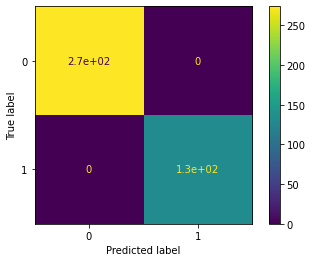

In [11]:
plot_confusion_matrix(svc,gene_trainset.transpose(),cls)
# clear separation

In [12]:
norm_vec_df.to_csv('EMT_STV_scRNAseq_MCF7.csv')
norm_vec_df.sort_values(by='norm_vec')

,norm_vec,s_vec
TFF1,-0.088849,-0.117283
STC2,-0.071470,-0.076458
XBP1,-0.061827,-0.098673
SLC39A6,-0.059359,-0.059785
CDH1,-0.055649,-0.049584
...,...,...
ACAA2,0.062487,0.052769
MARCKSL1,0.062749,0.053021
N4BP3,0.064326,0.048584
SOX4,0.071565,0.097178


In [13]:
norm_vec_df.loc['CDH1']

norm_vec   -0.055649
s_vec      -0.049584
Name: CDH1, dtype: float64

In [14]:
# run PCA and plot separation

pca = PCA(n_components=3)
Spca = pca.fit_transform(gene_trainset.transpose())
print("Explained variances by components: ", pca.explained_variance_ratio_, "total variance explained: ",sum(pca.explained_variance_ratio_))
PCA_sc = pd.DataFrame(Spca[:,:3],columns=['PC1','PC2','PC3'],index=gene_trainset.columns)
PCA_sc

Explained variances by components:  [0.03125482 0.01982984 0.0092762 ] total variance explained:  0.06036086151435843


,PC1,PC2,PC3
AAAGAACAGGTCACTT,-2.694617,2.032020,-3.694498
AAAGGATAGCAATTCC,1.320410,-2.133092,-4.458117
AAAGGGCCATCCTAAG,-1.998234,0.044994,-4.852093
AAAGGTAGTTAAACCC,-7.022945,2.397549,3.338602
AAATGGAGTTCGGTAT,-8.537937,0.304102,-2.051076
...,...,...,...
AGAGAATTCACACCGG,3.087013,-5.296275,-0.542100
AGCGTCGCACAACGCC,1.049465,-6.814998,-2.857667
GTGAGCCGTGCCAAGA,-6.300470,-2.962251,-2.127299
GTGGAAGCATACCGTA,-5.969502,-3.326229,2.602622


In [15]:
trainset_epi_PCA = PCA_sc.loc[MCF7_TGF_metadata.loc[MCF7_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index]
trainset_mes_PCA = PCA_sc.loc[MCF7_TGF_metadata.loc[MCF7_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index]
gene_trainset_PCA = pd.concat([trainset_epi_PCA,trainset_mes_PCA],axis=0)

cls_PCA = list(np.full(len(trainset_epi_PCA.index),0)) + list(np.full(len(trainset_mes_PCA.index),1))

svc_PCA = SVC(kernel='linear')
svc_PCA.fit(gene_trainset_PCA,cls_PCA)

print(svc_PCA.intercept_)


[-0.66660523]


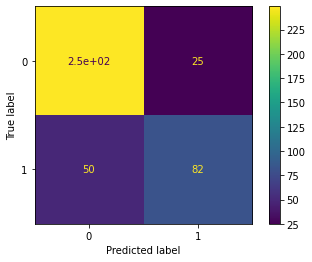

In [16]:
plot_confusion_matrix(svc_PCA,gene_trainset_PCA,cls_PCA)
# PCA introduces distortion to the data

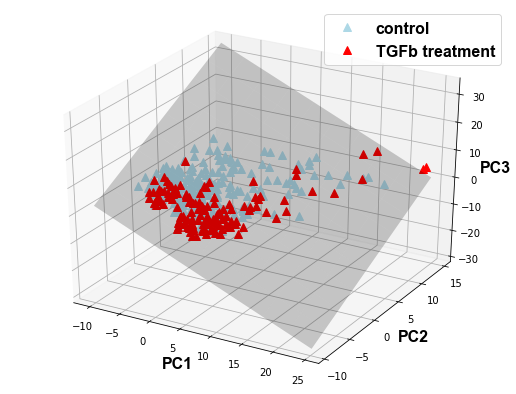

In [17]:
# 3D visualization with plane


fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 14} 
plt.rc('font', **fontAxes)

#plt.suptitle('PhosphoSite fold changes',**fontTitle)

z2 = lambda x,y: (-svc_PCA.intercept_-svc_PCA.coef_[0][0]*x-svc_PCA.coef_[0][1]*y) / svc_PCA.coef_[0][2]
tmpx = np.linspace(min(gene_trainset_PCA.iloc[:,0]),max(gene_trainset_PCA.iloc[:,0]),10)
tmpy = np.linspace(min(gene_trainset_PCA.iloc[:,1]),max(gene_trainset_PCA.iloc[:,1]),10)
xs,ys = np.meshgrid(tmpx,tmpy)
zs = z2(xs,ys)

ax.plot_surface(xs, ys, zs,color='black',linewidth=0,alpha=0.2)


ax.plot3D(PCA_sc.loc[MCF7_TGF_metadata.loc[MCF7_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index].iloc[:,0],PCA_sc.loc[MCF7_TGF_metadata.loc[MCF7_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index].iloc[:,1],PCA_sc.loc[MCF7_TGF_metadata.loc[MCF7_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index].iloc[:,2],'^',color='lightblue',label='control',ms=8) 

ax.plot3D(PCA_sc.loc[MCF7_TGF_metadata.loc[MCF7_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].iloc[:,0],PCA_sc.loc[MCF7_TGF_metadata.loc[MCF7_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].iloc[:,1],PCA_sc.loc[MCF7_TGF_metadata.loc[MCF7_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].iloc[:,2],'^',color='red',label='TGFb treatment',ms=8) 


#for smpl in drugs12pert.index:
#    ax.annotate(RPPA_legend.loc[smpl]['Sample Description (drug abbre. | dose or time-point)'],(PCA_TPM.loc[smpl][0],PCA_TPM.loc[smpl][1]))

ax.set_xlabel('PC1',**fontLabel)
ax.set_ylabel('PC2',**fontLabel)
ax.set_zlabel('PC3',**fontLabel)

#ax.set_xlim(-15,35)
#ax.set_ylim(-16,25)

ax.legend(numpoints=1,prop=fontLabel,ncol=1)
plt.show()



In [18]:
# entring parameters for plots
drug_plot='Necrostatin-5'
gene_name='VIM'

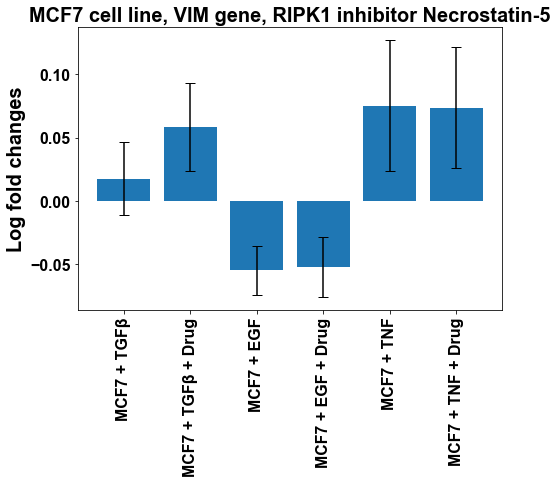

In [19]:
# make bar plot for all cells
names = ['MCF7 + TGFβ','MCF7 + TGFβ + Drug','MCF7 + EGF','MCF7 + EGF + Drug','MCF7 + TNF','MCF7 + TNF + Drug']

if drug_plot in list(set(MCF7_TGF_metadata['Drug'])):
    MCF7_TGF_gene_ctrl = statistics.mean(MCF7_TGF_scRNAseq_norm[MCF7_TGF_metadata.loc[MCF7_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].loc[gene_name])
    MCF7_TGF_gene_ctrl_err = stats.sem(MCF7_TGF_scRNAseq_norm[MCF7_TGF_metadata.loc[MCF7_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].loc[gene_name])
    MCF7_TGF_gene_drug = statistics.mean(MCF7_TGF_scRNAseq_norm[MCF7_TGF_metadata.loc[MCF7_TGF_metadata['Drug'] == drug_plot].index].loc[gene_name])
    MCF7_TGF_gene_drug_err = stats.sem(MCF7_TGF_scRNAseq_norm[MCF7_TGF_metadata.loc[MCF7_TGF_metadata['Drug'] == drug_plot].index].loc[gene_name])
else:
    MCF7_TGF_gene_ctrl = statistics.mean(MCF7_TGF_scRNAseq_norm[MCF7_TGF_metadata.loc[MCF7_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].loc[gene_name])
    MCF7_TGF_gene_ctrl_err = stats.sem(MCF7_TGF_scRNAseq_norm[MCF7_TGF_metadata.loc[MCF7_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].loc[gene_name])
    MCF7_TGF_gene_drug = 0
    MCF7_TGF_gene_drug_err = 0

if drug_plot in list(set(MCF7_EGF_metadata['Drug'])):
    MCF7_EGF_gene_ctrl = statistics.mean(MCF7_EGF_scRNAseq_norm[MCF7_EGF_metadata.loc[MCF7_EGF_metadata['Drug'] == 'Uninhibited_EGF'].index].loc[gene_name])
    MCF7_EGF_gene_ctrl_err = stats.sem(MCF7_EGF_scRNAseq_norm[MCF7_EGF_metadata.loc[MCF7_EGF_metadata['Drug'] == 'Uninhibited_EGF'].index].loc[gene_name])
    MCF7_EGF_gene_drug = statistics.mean(MCF7_EGF_scRNAseq_norm[MCF7_EGF_metadata.loc[MCF7_EGF_metadata['Drug'] == drug_plot].index].loc[gene_name])
    MCF7_EGF_gene_drug_err = stats.sem(MCF7_EGF_scRNAseq_norm[MCF7_EGF_metadata.loc[MCF7_EGF_metadata['Drug'] == drug_plot].index].loc[gene_name])
else:
    MCF7_EGF_gene_ctrl = statistics.mean(MCF7_EGF_scRNAseq_norm[MCF7_EGF_metadata.loc[MCF7_EGF_metadata['Drug'] == 'Uninhibited_EGF'].index].loc[gene_name])
    MCF7_EGF_gene_ctrl_err = stats.sem(MCF7_EGF_scRNAseq_norm[MCF7_EGF_metadata.loc[MCF7_EGF_metadata['Drug'] == 'Uninhibited_EGF'].index].loc[gene_name])
    MCF7_EGF_gene_drug = 0
    MCF7_EGF_gene_drug_err = 0

if drug_plot in list(set(MCF7_TNF_metadata['Drug'])):
    MCF7_TNF_gene_ctrl = statistics.mean(MCF7_TNF_scRNAseq_norm[MCF7_TNF_metadata.loc[MCF7_TNF_metadata['Drug'] == 'Uninhibited_TNF'].index].loc[gene_name])
    MCF7_TNF_gene_ctrl_err = stats.sem(MCF7_TNF_scRNAseq_norm[MCF7_TNF_metadata.loc[MCF7_TNF_metadata['Drug'] == 'Uninhibited_TNF'].index].loc[gene_name])
    MCF7_TNF_gene_drug = statistics.mean(MCF7_TNF_scRNAseq_norm[MCF7_TNF_metadata.loc[MCF7_TNF_metadata['Drug'] == drug_plot].index].loc[gene_name])
    MCF7_TNF_gene_drug_err = stats.sem(MCF7_TNF_scRNAseq_norm[MCF7_TNF_metadata.loc[MCF7_TNF_metadata['Drug'] == drug_plot].index].loc[gene_name])
else:
    MCF7_TNF_gene_ctrl = statistics.mean(MCF7_TNF_scRNAseq_norm[MCF7_TNF_metadata.loc[MCF7_TNF_metadata['Drug'] == 'Uninhibited_TNF'].index].loc[gene_name])
    MCF7_TNF_gene_ctrl_err = stats.sem(MCF7_TNF_scRNAseq_norm[MCF7_TNF_metadata.loc[MCF7_TNF_metadata['Drug'] == 'Uninhibited_TNF'].index].loc[gene_name])
    MCF7_TNF_gene_drug = 0
    MCF7_TNF_gene_drug_err = 0

values = [MCF7_TGF_gene_ctrl,MCF7_TGF_gene_drug,MCF7_EGF_gene_ctrl,MCF7_EGF_gene_drug,MCF7_TNF_gene_ctrl,MCF7_TNF_gene_drug]
errs = [MCF7_TGF_gene_ctrl_err,MCF7_TGF_gene_drug_err,MCF7_EGF_gene_ctrl_err,MCF7_EGF_gene_drug_err,MCF7_TNF_gene_ctrl_err,MCF7_TNF_gene_drug_err]

fig = plt.figure(figsize=(8,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

plt.title('MCF7 cell line, ' + gene_name + ' gene, ' + dr_legend.loc[drug_plot,'Target'] + ' inhibitor ' + drug_plot,**fontTitle)
plt.ylabel('Log fold changes',**fontLabel)
plt.bar(names,values,yerr=errs,capsize=5)
plt.xticks(rotation='vertical')
fig.tight_layout()
plt.show()

In [20]:
# plotting DPD distribution
drug_plot='Necrostatin-5'

DPD for epithelial state = -3.924298812947264 ± 0.02305795019723016
DPD for TGFb control = 3.8576468484578226 ± 0.023763751802343996
DPD for RIPK1 inhibitor = -2.0133757330933015 ± 0.1193871964316058


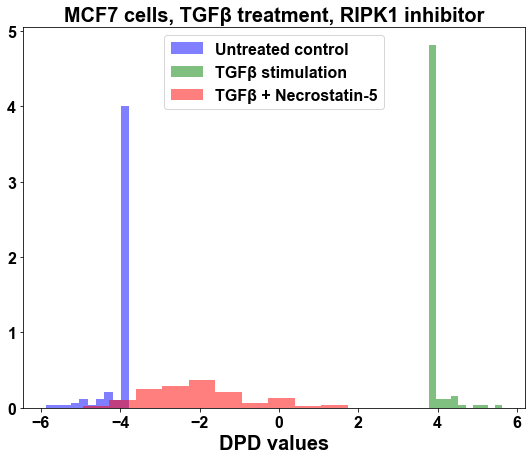

In [21]:
DPDs_epi = []
for code in MCF7_TGF_metadata.loc[MCF7_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index:
    DPDs_epi.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],MCF7_TGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_mes = []
for code in MCF7_TGF_metadata.loc[MCF7_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index:
    DPDs_mes.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],MCF7_TGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_drg = []
for code in MCF7_TGF_metadata.loc[MCF7_TGF_metadata['Drug'] == drug_plot].index:
    DPDs_drg.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],MCF7_TGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

fig = plt.figure(figsize=(9,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

print('DPD for epithelial state = ' + str(statistics.mean(DPDs_epi)) + ' ± ' + str(stats.sem(DPDs_epi)))
print('DPD for TGFb control = ' + str(statistics.mean(DPDs_mes)) + ' ± ' + str(stats.sem(DPDs_mes)))
print('DPD for ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor = ' + str(statistics.mean(DPDs_drg)) + ' ± ' + str(stats.sem(DPDs_drg)))

plt.hist(DPDs_epi, bins=10,density=True,color='blue',label='Untreated control',alpha=0.5)
plt.hist(DPDs_mes, bins=10,density=True,color='green',label='TGFβ stimulation',alpha=0.5)
plt.hist(DPDs_drg, bins=10,density=True,color='red',label='TGFβ + ' + drug_plot,alpha=0.5) 

plt.title('MCF7 cells, TGFβ treatment, ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor',**fontTitle)
#plt.xlim(0,200)
plt.legend()
plt.xlabel('DPD values',**fontLabel)

plt.show()

DPD for epithelial state = -3.924298812947264 ± 0.02305795019723016
DPD for TGFb control = 3.8576468484578226 ± 0.023763751802343996
DPD for RIPK1 inhibitor = -2.0133757330933015 ± 0.1193871964316058


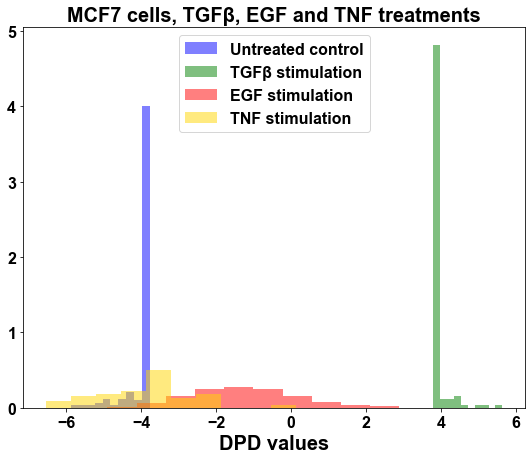

In [22]:
DPDs_epi = []
for code in MCF7_TGF_metadata.loc[MCF7_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index:
    DPDs_epi.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],MCF7_TGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_mes = []
for code in MCF7_TGF_metadata.loc[MCF7_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index:
    DPDs_mes.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],MCF7_TGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_EGF = []
for code in MCF7_EGF_metadata.loc[MCF7_EGF_metadata['Drug'] == 'Uninhibited_EGF'].index:
    DPDs_EGF.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],MCF7_EGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_TNF = []
for code in MCF7_TNF_metadata.loc[MCF7_TNF_metadata['Drug'] == drug_plot].index:
    DPDs_TNF.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],MCF7_TNF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

fig = plt.figure(figsize=(9,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

print('DPD for epithelial state = ' + str(statistics.mean(DPDs_epi)) + ' ± ' + str(stats.sem(DPDs_epi)))
print('DPD for TGFb control = ' + str(statistics.mean(DPDs_mes)) + ' ± ' + str(stats.sem(DPDs_mes)))
print('DPD for ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor = ' + str(statistics.mean(DPDs_drg)) + ' ± ' + str(stats.sem(DPDs_drg)))

plt.hist(DPDs_epi, bins=10,density=True,color='blue',label='Untreated control',alpha=0.5)
plt.hist(DPDs_mes, bins=10,density=True,color='green',label='TGFβ stimulation',alpha=0.5)
plt.hist(DPDs_EGF, bins=10,density=True,color='red',label='EGF stimulation',alpha=0.5) 
plt.hist(DPDs_TNF, bins=10,density=True,color='gold',label='TNF stimulation',alpha=0.5) 

plt.title('MCF7 cells, TGFβ, EGF and TNF treatments',**fontTitle)
#plt.xlim(0,200)
plt.legend()
plt.xlabel('DPD values',**fontLabel)

plt.show()

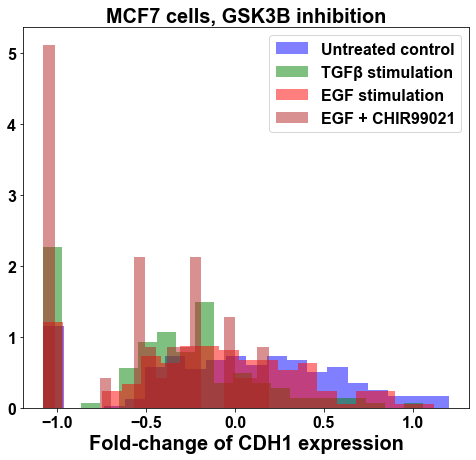

In [23]:
# plot distribution for specific gene
gene_name='CDH1'
drug_plot='CHIR99021'

MCF7_TGF_gene_notr = list(MCF7_TGF_scRNAseq_norm[MCF7_TGF_metadata.loc[MCF7_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index].loc[gene_name])
MCF7_TGF_gene_ctrl = list(MCF7_TGF_scRNAseq_norm[MCF7_TGF_metadata.loc[MCF7_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].loc[gene_name])
if drug_plot in list(set(MCF7_TGF_metadata['Drug'])):
    MCF7_TGF_gene_drug = list(MCF7_TGF_scRNAseq_norm[MCF7_TGF_metadata.loc[MCF7_TGF_metadata['Drug'] == drug_plot].index].loc[gene_name])
else:
    MCF7_TGF_gene_drug = []

MCF7_EGF_gene_notr = list(MCF7_EGF_scRNAseq_norm[MCF7_EGF_metadata.loc[MCF7_EGF_metadata['Drug'] == 'Uninhibited_Untreated'].index].loc[gene_name])
MCF7_EGF_gene_ctrl = list(MCF7_EGF_scRNAseq_norm[MCF7_EGF_metadata.loc[MCF7_EGF_metadata['Drug'] == 'Uninhibited_EGF'].index].loc[gene_name])
if drug_plot in list(set(MCF7_EGF_metadata['Drug'])):
    MCF7_EGF_gene_drug = list(MCF7_EGF_scRNAseq_norm[MCF7_EGF_metadata.loc[MCF7_EGF_metadata['Drug'] == drug_plot].index].loc[gene_name])
else:
    MCF7_EGF_gene_drug = []

MCF7_TNF_gene_notr = list(MCF7_TNF_scRNAseq_norm[MCF7_TNF_metadata.loc[MCF7_TNF_metadata['Drug'] == 'Uninhibited_Untreated'].index].loc[gene_name])
MCF7_TNF_gene_ctrl = list(MCF7_TNF_scRNAseq_norm[MCF7_TNF_metadata.loc[MCF7_TNF_metadata['Drug'] == 'Uninhibited_TNF'].index].loc[gene_name])
if drug_plot in list(set(MCF7_TNF_metadata['Drug'])):
    MCF7_TNF_gene_drug = list(MCF7_TNF_scRNAseq_norm[MCF7_TNF_metadata.loc[MCF7_TNF_metadata['Drug'] == drug_plot].index].loc[gene_name])
else:
    MCF7_TNF_gene_drug = []

fig = plt.figure(figsize=(8,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

plt.hist(MCF7_TGF_gene_notr, bins=20,density=True,color='blue',label='Untreated control',alpha=0.5)
plt.hist(MCF7_TGF_gene_ctrl, bins=20,density=True,color='green',label='TGFβ stimulation',alpha=0.5)
plt.hist(MCF7_EGF_gene_ctrl, bins=20,density=True,color='red',label='EGF stimulation',alpha=0.5)
plt.hist(MCF7_EGF_gene_drug, bins=20,density=True,color='firebrick',label='EGF + ' + drug_plot,alpha=0.5)

plt.title('MCF7 cells, '+ dr_legend.loc[drug_plot]['Target'] + ' inhibition',**fontTitle)
#plt.ylim(0,1)
plt.legend()
plt.xlabel('Fold-change of ' + gene_name + ' expression',**fontLabel)

plt.show()

DPD for epithelial state = -3.924298812947264 ± 0.02305795019723016
DPD for TGFb control = 3.8576468484578226 ± 0.023763751802343996
DPD for GSK3B inhibitor = 1.6800358416537922 ± 0.1852807082961692


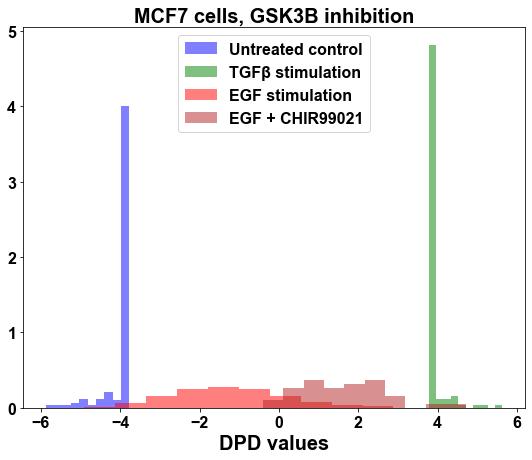

In [24]:
DPDs_epi = []
for code in MCF7_TGF_metadata.loc[MCF7_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index:
    DPDs_epi.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],MCF7_TGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_mes = []
for code in MCF7_TGF_metadata.loc[MCF7_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index:
    DPDs_mes.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],MCF7_TGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_EGF = []
for code in MCF7_EGF_metadata.loc[MCF7_EGF_metadata['Drug'] == 'Uninhibited_EGF'].index:
    DPDs_EGF.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],MCF7_EGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_drg = []
for code in MCF7_EGF_metadata.loc[MCF7_EGF_metadata['Drug'] == drug_plot].index:
    DPDs_drg.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],MCF7_EGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

fig = plt.figure(figsize=(9,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

print('DPD for epithelial state = ' + str(statistics.mean(DPDs_epi)) + ' ± ' + str(stats.sem(DPDs_epi)))
print('DPD for TGFb control = ' + str(statistics.mean(DPDs_mes)) + ' ± ' + str(stats.sem(DPDs_mes)))
print('DPD for ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor = ' + str(statistics.mean(DPDs_drg)) + ' ± ' + str(stats.sem(DPDs_drg)))

plt.hist(DPDs_epi, bins=10,density=True,color='blue',label='Untreated control',alpha=0.5)
plt.hist(DPDs_mes, bins=10,density=True,color='green',label='TGFβ stimulation',alpha=0.5)
plt.hist(DPDs_EGF, bins=10,density=True,color='red',label='EGF stimulation',alpha=0.5) 
plt.hist(DPDs_drg, bins=10,density=True,color='firebrick',label='EGF + ' + drug_plot,alpha=0.5) 

plt.title('MCF7 cells, '+ dr_legend.loc[drug_plot]['Target'] + ' inhibition',**fontTitle)
#plt.xlim(0,200)
plt.legend()
plt.xlabel('DPD values',**fontLabel)

plt.show()

DPD for epithelial state = -3.9242988129472636 ± 0.02305795048874827
DPD for EGF control = -1.2524286108618923 ± 0.1000746715482588
DPD for GSK3B inhibitor = 1.6800358416537922 ± 0.1852807082961692


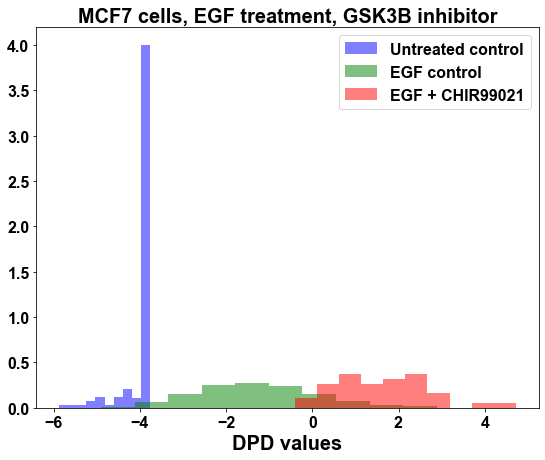

In [25]:
DPDs_epi = []
for code in MCF7_EGF_metadata.loc[MCF7_EGF_metadata['Drug'] == 'Uninhibited_Untreated'].index:
    DPDs_epi.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],MCF7_EGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_mes = []
for code in MCF7_EGF_metadata.loc[MCF7_EGF_metadata['Drug'] == 'Uninhibited_EGF'].index:
    DPDs_mes.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],MCF7_EGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_drg = []
for code in MCF7_EGF_metadata.loc[MCF7_EGF_metadata['Drug'] == drug_plot].index:
    DPDs_drg.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],MCF7_EGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

fig = plt.figure(figsize=(9,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

print('DPD for epithelial state = ' + str(statistics.mean(DPDs_epi)) + ' ± ' + str(stats.sem(DPDs_epi)))
print('DPD for EGF control = ' + str(statistics.mean(DPDs_mes)) + ' ± ' + str(stats.sem(DPDs_mes)))
print('DPD for ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor = ' + str(statistics.mean(DPDs_drg)) + ' ± ' + str(stats.sem(DPDs_drg)))

plt.hist(DPDs_epi, bins=10,density=True,color='blue',label='Untreated control',alpha=0.5)
plt.hist(DPDs_mes, bins=10,density=True,color='green',label='EGF control',alpha=0.5)
plt.hist(DPDs_drg, bins=10,density=True,color='red',label='EGF + ' + drug_plot,alpha=0.5) 

plt.title('MCF7 cells, EGF treatment, ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor',**fontTitle)
#plt.xlim(0,200)
plt.legend()
plt.xlabel('DPD values',**fontLabel)

plt.show()

DPD for epithelial state = -3.924298812947264 ± 0.02305795019723016
DPD for TNF control = -0.1162646790478291 ± 0.1760897913536333
DPD for GSK3B inhibitor = 1.99185494408966 ± 0.34570006348449234


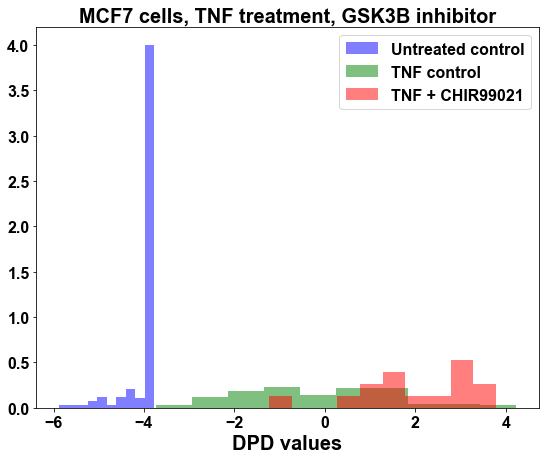

In [26]:
DPDs_epi = []
for code in MCF7_TNF_metadata.loc[MCF7_TNF_metadata['Drug'] == 'Uninhibited_Untreated'].index:
    DPDs_epi.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],MCF7_TNF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_mes = []
for code in MCF7_TNF_metadata.loc[MCF7_TNF_metadata['Drug'] == 'Uninhibited_TNF'].index:
    DPDs_mes.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],MCF7_TNF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_drg = []
for code in MCF7_TNF_metadata.loc[MCF7_TNF_metadata['Drug'] == drug_plot].index:
    DPDs_drg.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],MCF7_TNF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

fig = plt.figure(figsize=(9,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

print('DPD for epithelial state = ' + str(statistics.mean(DPDs_epi)) + ' ± ' + str(stats.sem(DPDs_epi)))
print('DPD for TNF control = ' + str(statistics.mean(DPDs_mes)) + ' ± ' + str(stats.sem(DPDs_mes)))
print('DPD for ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor = ' + str(statistics.mean(DPDs_drg)) + ' ± ' + str(stats.sem(DPDs_drg)))

plt.hist(DPDs_epi, bins=10,density=True,color='blue',label='Untreated control',alpha=0.5)
plt.hist(DPDs_mes, bins=10,density=True,color='green',label='TNF control',alpha=0.5)
plt.hist(DPDs_drg, bins=10,density=True,color='red',label='TNF + ' + drug_plot,alpha=0.5) 

plt.title('MCF7 cells, TNF treatment, ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor',**fontTitle)
#plt.xlim(0,200)
plt.legend()
plt.xlabel('DPD values',**fontLabel)

plt.show()

In [27]:
# now we need to calculate DPDs
dr_legend['DPD_MCF7_TGFB']=np.nan
dr_legend['DPD_MCF7_EGF']=np.nan
dr_legend['DPD_MCF7_TNF']=np.nan

for drug in list(set(MCF7_TGF_metadata['Drug'])):
    #print("Processing data for MCF7 cells, TGFB, " + drug)
    DPDs_drg = []
    for code in MCF7_TGF_metadata.loc[MCF7_TGF_metadata['Drug'] == drug].index:
        DPDs_drg.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],MCF7_TGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))
    dr_legend.at[drug,'DPD_MCF7_TGFB'] = statistics.mean(DPDs_drg)

for drug in list(set(MCF7_EGF_metadata['Drug'])):
    #print("Processing data for MCF7 cells, EGF, " + drug)
    DPDs_drg = []
    for code in MCF7_EGF_metadata.loc[MCF7_EGF_metadata['Drug'] == drug].index:
        DPDs_drg.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],MCF7_EGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))
    dr_legend.at[drug,'DPD_MCF7_EGF'] = statistics.mean(DPDs_drg)

for drug in list(set(MCF7_TNF_metadata['Drug'])):
    #print("Processing data for MCF7 cells, TNF, " + drug)
    DPDs_drg = []
    for code in MCF7_TNF_metadata.loc[MCF7_TNF_metadata['Drug'] == drug].index:
        DPDs_drg.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],MCF7_TNF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))
    dr_legend.at[drug,'DPD_MCF7_TNF'] = statistics.mean(DPDs_drg)

dr_legend.to_csv('MCF7_EMT_scDPD_vals.csv')
dr_legend

,Target,DPD_MCF7_TGFB,DPD_MCF7_EGF,DPD_MCF7_TNF
Drug,,,,
PKC 412,PKC,0.139302,-0.790842,NaN
Doramapimod,p38,1.431406,-0.762851,0.616680
Erlotinib,EGFR,1.547298,-2.421339,-0.113443
NVP-BEZ235,PI3K,NaN,2.570406,NaN
Phthalazinone Pyrazole,Aurora-A,NaN,1.777052,2.151721
Torin 1,mTOR,NaN,2.805625,NaN
BIBF 1120,VGFR/PDGFR/FGFR,0.143636,-3.547360,-2.095284
CAY10657,IKK2,NaN,-0.355162,-0.919942
Ruxolitinib,JAK,1.569744,-0.799862,-0.182880


In [28]:
KEA_df = pd.read_excel('kinase_screen_signatures.xlsx',index_col=0)
KEA_df

,Target,transcr_targets
Drug,,
LY364947,TGFBR1,"CDH1,TGFB1I1,PPP1CA,WWP2,EGR1,STAT1,OTUB1,SP1,..."
Erlotinib,EGFR,"ATM,CAV1,HSP90AA1,EGR1,PPARG,FOS,STAT1,PTPN1,H..."
Gefitinib,EGFR,"ATM,CAV1,HSP90AA1,EGR1,PPARG,FOS,STAT1,PTPN1,H..."
BIBF 1120,VGFR/PDGFR/FGFR,"ATM,CAV1,HSP90AA1,EGR1,PPARG,FOS,STAT1,PTPN1,H..."
PD 0325901,MEK/ERK,"NFIC,JAK1,GSK3B,STUB1,JUND,TUBB,TGFB1I1,NFATC1..."
NVP-BEZ235,PI3K/mTOR,"FOXO3,RARA,GADD45A,KDM5A,RPS3,PPP2R1A,EGR1,GSK..."
Torin 1,PI3K/mTOR,"FOXO3,RARA,GADD45A,KDM5A,RPS3,PPP2R1A,EGR1,GSK..."
PKC 412,PKC,"ELF3,HNRNPD,AURKA,PA2G4,RB1,GADD45A,KDM1A,FBXW..."
Doramapimod,p38,"SVIL,AURKA,STAG1,GSK3B,YY1,USP37,JUND,FOXM1,TU..."


In [29]:
# preparing modules and perturbation lists
perturbations = list(KEA_df.index)
modules = []
for pert in perturbations:
    if len(modules) > 0:
        if KEA_df.loc[pert,'Target'] != modules[-1]:
            modules.append(KEA_df.loc[pert,'Target'])
    else: 
        modules.append(KEA_df.loc[pert,'Target'])
modules.append('DPD')
print("Our modules are: " + ", ".join(modules) + ". " + str(len(modules)) + " in total.")
print('\n')
print("Applied perturbations are: " + ", ".join(perturbations) + ". " + str(len(perturbations)) + " in total.")


Our modules are: TGFBR1, EGFR, VGFR/PDGFR/FGFR, MEK/ERK, PI3K/mTOR, PKC, p38, JNK, Aurora-A, RIPK1, IKK2, JAK, GSK3B, DPD. 14 in total.


Applied perturbations are: LY364947, Erlotinib, Gefitinib, BIBF 1120, PD 0325901, NVP-BEZ235, Torin 1, PKC 412, Doramapimod, SP 600125, Phthalazinone Pyrazole, Necrostatin-5, CAY10657, Ruxolitinib, CHIR99021. 15 in total.


In [30]:
# filling R matrices for MCF7 cells
R_MCF7_TGF = pd.DataFrame(np.zeros((1,len(perturbations))),index=['DPD'],columns=perturbations)
R_MCF7_EGF = pd.DataFrame(np.zeros((1,len(perturbations))),index=['DPD'],columns=perturbations)
R_MCF7_TNF = pd.DataFrame(np.zeros((1,len(perturbations))),index=['DPD'],columns=perturbations)


# fillfing DPD
for pert in perturbations:
    # TGFb
    x0 = dr_legend.loc['Uninhibited_TGFB1','DPD_MCF7_TGFB']
    x1 = dr_legend.loc[pert,'DPD_MCF7_TGFB']
    R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
    R_MCF7_TGF.at['DPD',pert] = R_global
    # EGF
    if pert=='Erlotinib':
        x0 = dr_legend.loc['Uninhibited_EGF','DPD_MCF7_EGF']
        x1 = dr_legend.loc['Uninhibited_Untreated','DPD_MCF7_EGF']
        R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
        R_MCF7_EGF.at['DPD',pert] = R_global
    else:
        x0 = dr_legend.loc['Uninhibited_EGF','DPD_MCF7_EGF']
        x1 = dr_legend.loc[pert,'DPD_MCF7_EGF']
        R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
        R_MCF7_EGF.at['DPD',pert] = R_global
    # TNF
    x0 = dr_legend.loc['Uninhibited_TNF','DPD_MCF7_TNF']
    x1 = dr_legend.loc[pert,'DPD_MCF7_TNF']
    R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
    R_MCF7_TNF.at['DPD',pert] = R_global

R_MCF7_EGF.drop('Gefitinib', axis=1, inplace=True)
R_MCF7_EGF.rename(columns={'Erlotinib': 'EGF'}, inplace=True)

R_MCF7_TGF.to_csv('R_MCF7_TGFb_DPD.csv')
R_MCF7_EGF.to_csv('R_MCF7_EGF_DPD.csv')
R_MCF7_TNF.to_csv('R_MCF7_TNF_DPD.csv')
R_MCF7_TGF

,LY364947,Erlotinib,Gefitinib,BIBF 1120,PD 0325901,NVP-BEZ235,Torin 1,PKC 412,Doramapimod,SP 600125,Phthalazinone Pyrazole,Necrostatin-5,CAY10657,Ruxolitinib,CHIR99021
DPD,-1.896549,-0.598901,-0.616588,-0.962766,-1.417134,NaN,NaN,-0.963889,-0.628943,-0.612804,NaN,-1.521918,NaN,-0.593083,-0.231626


In [31]:
R_MCF7_EGF

,LY364947,EGF,BIBF 1120,PD 0325901,NVP-BEZ235,Torin 1,PKC 412,Doramapimod,SP 600125,Phthalazinone Pyrazole,Necrostatin-5,CAY10657,Ruxolitinib,CHIR99021
DPD,-0.727611,-0.680853,-0.646941,-0.691992,1.487249,1.446399,0.368554,0.390903,0.270862,1.704779,-0.727218,0.716421,0.361352,1.745477


In [32]:
R_MCF7_TNF

,LY364947,Erlotinib,Gefitinib,BIBF 1120,PD 0325901,NVP-BEZ235,Torin 1,PKC 412,Doramapimod,SP 600125,Phthalazinone Pyrazole,Necrostatin-5,CAY10657,Ruxolitinib,CHIR99021
DPD,-0.971023,0.024266,1.583716,-0.944511,-0.95099,NaN,NaN,NaN,1.188533,-0.629895,1.054033,-0.970111,-0.873617,-0.364255,1.05837
